In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp  
from matplotlib import rcParams

#rcParams['figure.figsize'] = 15,7
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 3 )

plt.rc('figure', figsize=(8,4) )         # Image size

In [90]:


# Define derivative function
def f(t, y, c):
    
    dydt=np.zeros(3)
    dydt[0]=-c[0]*y[0]*y[1]
    dydt[1]=c[0]*y[0]*y[1]-c[1]*y[1]
    dydt[2]=c[1]*y[1]

    return dydt


def sir(c):

    sol = solve_ivp(lambda t, y: f(t, y, c),[tspan[0], tspan[-1]], yinit, t_eval=tspan)
    return sol



tstart=0 
tend=350
tstep=0.1
tspan = np.arange(tstart,tend,tstep)

i0=1e-6
r0=0.5
s0=1-1e-6-r0

beta=1.5
gamma=0.3
yinit = (s0,i0,r0)

beta_list=np.arange(1,4,0.5)
#gamma_list=np.arange(0.3,0.8,0.1)
#r_0_list=np.arange(1,7,1)
#beta_list=np.arange(1,7,1)

i_list=[]
r_list=[]
s_list=[]

for beta in beta_list:
    #gamma=beta/r
    c = [beta,gamma]
    sol=sir(c)
    i_list.append(sol.y[1])
    r_list.append(sol.y[0])
    s_list.append(sol.y[2])
t_list=sol.t



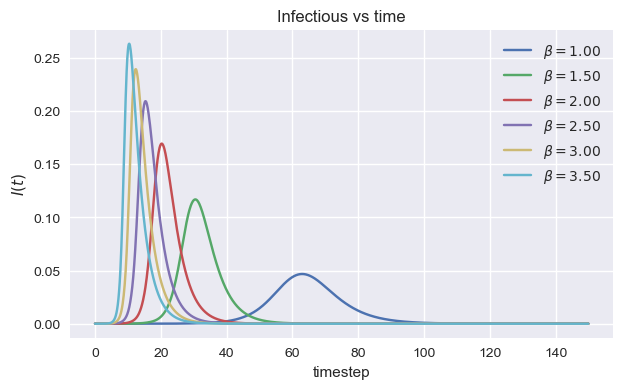

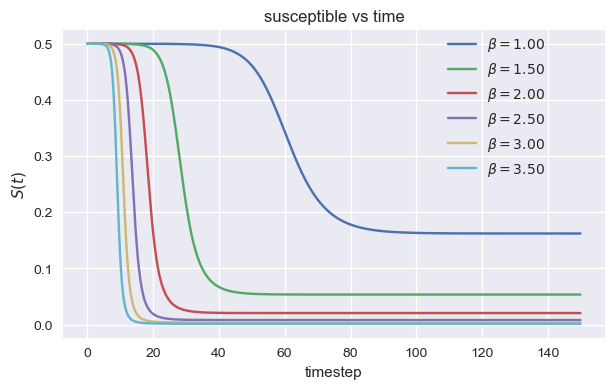

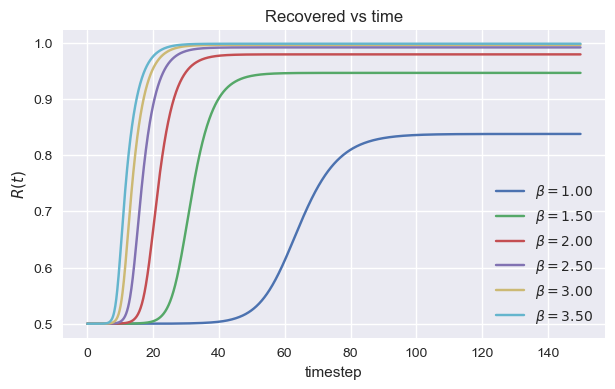

In [91]:
plt.style.use('seaborn')
figsize=(7,4)
fig1=plt.figure(figsize=figsize)
fig2=plt.figure(figsize=figsize)
fig3=plt.figure(figsize=figsize)

ax1=fig1.add_subplot(xlabel='timestep',ylabel='$I(t)$',title='Infectious vs time')
ax2=fig2.add_subplot(xlabel='timestep',ylabel='$S(t)$',title='susceptible vs time')
ax3=fig3.add_subplot(xlabel='timestep',ylabel='$R(t)$',title='Recovered vs time')

e=1500
for i in range(np.shape(beta_list)[0]):
    ax1.plot(t_list[:e],i_list[i][:e],label='$\\beta = %0.2f$'%(beta_list[i]))
    ax2.plot(t_list[:e],r_list[i][:e],label='$\\beta = %0.2f$'%(beta_list[i]))
    ax3.plot(t_list[:e],s_list[i][:e],label='$\\beta = %0.2f$'%(beta_list[i]))

ax1.legend(loc='upper right')
ax2.legend(loc=(0.7,0.5))
ax3.legend(loc='lower right')

fig1.savefig('beta-I.pdf')
fig2.savefig('beta-S.pdf')
fig3.savefig('beta-R.pdf')

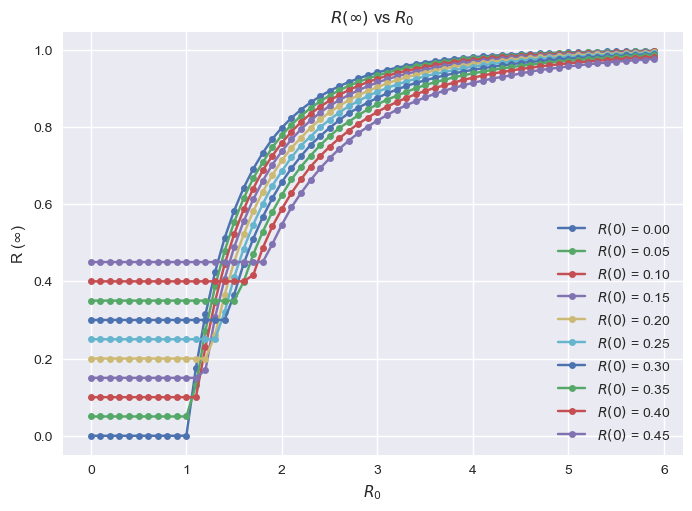

In [131]:
fig=plt.figure()
ax=fig.add_subplot()

plt.xlabel('$R_0$')
plt.ylabel('R ($\infty$)')
plt.title('$R(\infty)$ vs $R_0$')

beta_range=np.arange(0,6,0.01)
gamma=1
r0=np.arange(0,0.5,0.05)
for r in r0:
    r_list=[]
    s0=1-1e-6-r
    i0=1e-6
    yinit = (s0,i0,r)
    for beta in beta_range: 
        c=[beta,gamma]
        sol = solve_ivp(lambda t, y: f(t, y, c),[tspan[0], tspan[-1]],yinit, t_eval=tspan)
        r_list.append(sol.y[2][-1])
    ax.plot(beta_range[::10],r_list[::10],'-o',label="$R(0)$ = %0.2f"%r,ms=5)
ax.legend()

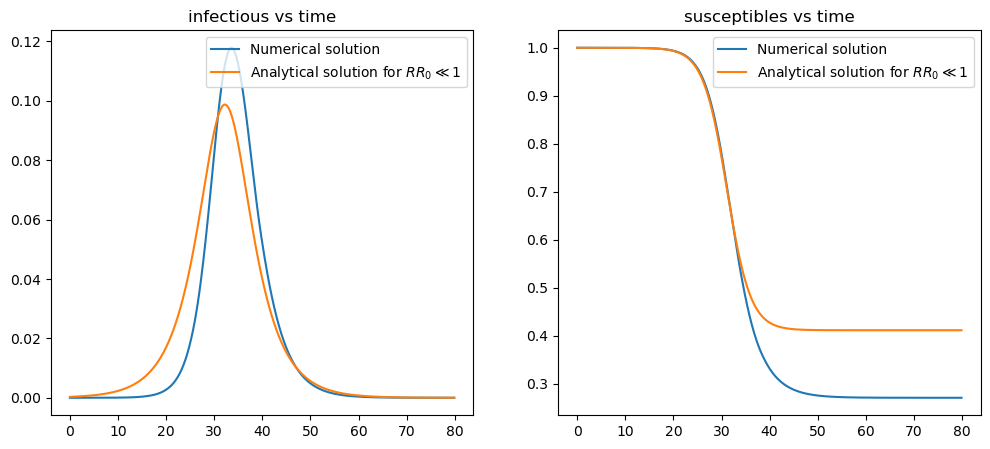

In [100]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

def S(t):
    r_0=beta/gamma
    alpha=np.sqrt(((s0*r_0-1)**2+2*s0*i0*r_0**2))
    phi=np.arctanh((1/alpha)*(s0*r_0-1))
    a=((alpha**2)/(2*s0*r_0**2))
    b=(1/2)*alpha*gamma
    p=(2*a*np.exp(2*phi)*(np.exp(2*b*t)-1))/(b*(np.exp(2*phi)+1)*(np.exp(2*b*t)+np.exp(2*phi)))
    return s0*np.exp(-beta*p)
def I(t):
    r_0=beta/gamma
    alpha=np.sqrt(((s0*r_0-1)**2+2*s0*i0*r_0**2))
    phi=np.arctanh((1/alpha)*(s0*r_0-1))
    return ((alpha**2)/(2*s0*r_0**2))*(1/np.cosh((1/2)*alpha*gamma*t-phi))

# Define derivative function
def f(t, y, c):
    
    dydt=np.zeros(3)
    dydt[0]=-c[0]*y[0]*y[1]
    dydt[1]=c[0]*y[0]*y[1]-c[1]*y[1]
    dydt[2]=c[1]*y[1]

    return dydt


def sir(c):

    sol = solve_ivp(lambda t, y: f(t, y, c),[tspan[0], tspan[-1]], yinit, t_eval=tspan)
    return sol



tstart=0 
tend=80
tstep=0.1
tspan = np.arange(tstart,tend,tstep)

i0=1e-6
r0=0.0001
s0=1-1e-6-r0

beta=0.9
gamma=0.5
yinit = (s0,i0,r0)

r=beta/gamma
c = [beta,gamma]

sol=sir(c)
i=sol.y[1]
r=sol.y[2]
s=sol.y[0]
t_list=sol.t

plt.style.use('default')
ax[0].plot(t_list,i,label='Numerical solution')
ax[0].plot(t_list,I(t_list),label='Analytical solution for $RR_0 \ll 1$')
ax[1].plot(t_list,s,label='Numerical solution')
ax[1].plot(t_list,S(t_list),label='Analytical solution for $RR_0 \ll 1$')
ax[1].legend(loc='upper right')
ax[0].legend(loc='upper right')

ax[0].set_title('infectious vs time')
ax[1].set_title('susceptibles vs time')
fig.savefig('rr0.pdf')
plt.show()

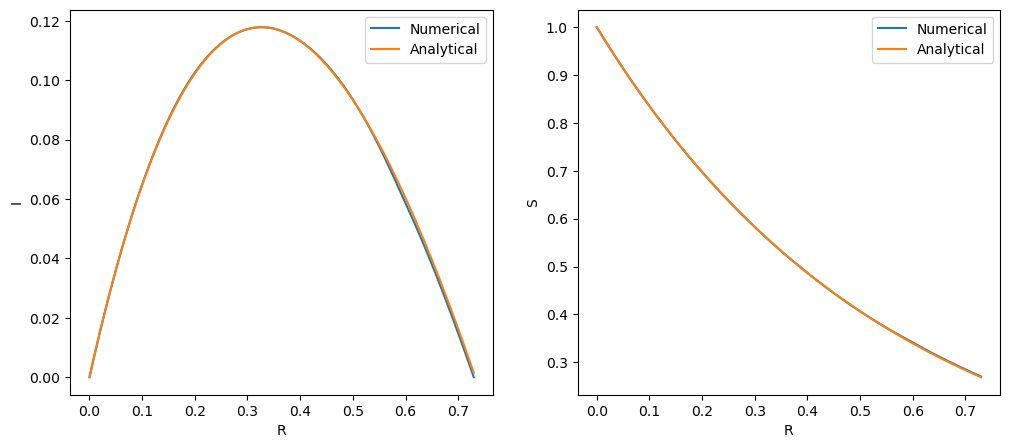

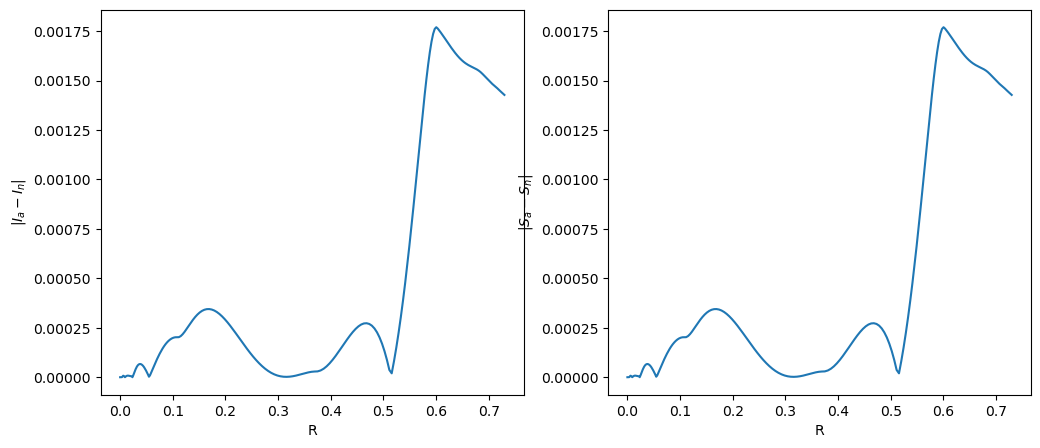

In [98]:
def I(R):
    return -s0*np.exp(R_0*r0)*np.exp(-R*R_0)-R+i0+r0+s0*np.exp(R_0*r0)*np.exp(-r0*R_0)
def S(R):
    return np.exp(r0*R_0)*s0*np.exp(-R*R_0)

tstart=0 
tend=80
tstep=0.1
tspan = np.arange(tstart,tend,tstep)

i0=1e-6
r0=0.0001
s0=1-1e-6-r0

beta=0.9
gamma=0.5
R_0=beta/gamma
yinit = (s0,i0,r0)

r=beta/gamma
c = [beta,gamma]

sol=sir(c)
i=sol.y[1]
r=sol.y[2]
s=sol.y[0]
t_list=sol.t



plt.style.use('default')
fig1,ax1=plt.subplots(1,2,figsize=(12,5))


ax1[0].plot(r,i,label='Numerical')
ax1[0].plot(r,I(r),label='Analytical')
ax1[1].plot(r,s,label='Numerical')
ax1[1].plot(r,S(r),label='Analytical')
ax1[0].legend()
ax1[1].legend()
ax1[0].set_xlabel('R')
ax1[1].set_xlabel('R')
ax1[0].set_ylabel('I')
ax1[1].set_ylabel('S')
fig2,ax2=plt.subplots(1,2,figsize=(12,5))

ax2[0].plot(r,abs(i-I(r)))
ax2[1].plot(r,abs(s-S(r)))
ax2[0].set_xlabel('R')
ax2[1].set_xlabel('R')
ax2[0].set_ylabel('$|I_{a}-I_{n}|$')
ax2[1].set_ylabel('$|S_{a}-S_{n}|$')
fig1.savefig('ana vs nume.pdf')
fig2.savefig('ana vs nume error.pdf')
plt.show()

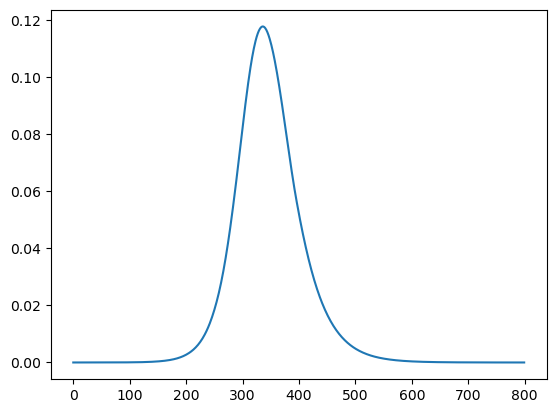

In [83]:
plt.plot(i)